<a href="https://colab.research.google.com/github/varnitha1206/Classification-of-Suicidal-Ideation-and-Behaviour/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('foreveralone.csv')
dataset

,gender,sexuallity,age,income,race,social_fear,depressed,employment,attempt_suicide
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Yes,Yes,Employed for wages,Yes
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Yes,Yes,Out of work and looking for work,No
2,Male,Straight,22,$0,White non-Hispanic,Yes,Yes,Out of work but not currently looking for work,No
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Yes,Yes,A student,No
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,No,Yes,Employed for wages,No
...,...,...,...,...,...,...,...,...,...
464,Female,Straight,26,"$10,000 to $19,999",White non-Hispanic,Yes,No,Employed for wages,No
465,Male,Straight,31,"$30,000 to $39,999",White non-Hispanic,No,No,Employed for wages,No
466,Female,Straight,17,"$1 to $10,000",Asian,Yes,Yes,Employed for wages,Yes
467,Male,Straight,18,$0,Asian,Yes,Yes,Out of work but not currently looking for work,No


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X,y)

[['Male' 'Straight' 35 ... 'Yes' 'Yes' 'Employed for wages']
 ['Male' 'Bisexual' 21 ... 'Yes' 'Yes' 'Out of work and looking for work']
 ['Male' 'Straight' 22 ... 'Yes' 'Yes'
  'Out of work but not currently looking for work']
 ...
 ['Female' 'Straight' 17 ... 'Yes' 'Yes' 'Employed for wages']
 ['Male' 'Straight' 18 ... 'Yes' 'Yes'
  'Out of work but not currently looking for work']
 ['Male' 'Straight' 28 ... 'Yes' 'Yes' 'Employed for wages']] ['Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 

In [ ]:
print(type(X))
print(X.shape)
print(X.size)

<class 'numpy.ndarray'>
(469, 8)
3752


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# cl=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
le=LabelEncoder()
# X=np.array(cl.fit_transform(X))
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
y=le.fit_transform(y)
print(y)
print(type(X))

[1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]
<class 'numpy.ndarray'>


In [ ]:
print("Number of Yes in dataset = ",np.count_nonzero(y==1))
print("Number of No in dataset = ",np.count_nonzero(y==0))

Number of Yes in dataset =  85
Number of No in dataset =  384


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train,y_train)
print(X_train.shape)

[[1 2 24 ... 1 1 2]
 [1 0 26 ... 1 0 7]
 [1 2 25 ... 0 1 1]
 ...
 [1 2 19 ... 1 0 1]
 [1 2 25 ... 1 1 1]
 [1 2 28 ... 1 1 2]] [0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
(328, 8)


In [ ]:
print(X_train.shape)
print(X_train.size)
print(X_test.shape)
print(X_test.size)

(328, 8)
2624
(141, 8)
1128


In [ ]:
print(X_train[0,:])
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,[2]] = sc.fit_transform(X_train[:,[2]])
X_test[:,[2]] = sc.transform(X_test[:,[2]])
print(X_train[0,:])

[1 2 24 11 0 1 1 2]
[1 2 -0.003456383030709266 11 0 1 1 2]


In [ ]:
# Decision Tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

0.8156028368794326





[Text(0.5, 0.875, 'X[6] <= 0.5\ngini = 0.303\nsamples = 328\nvalue = [267, 61]'),
 Text(0.25, 0.625, 'X[1] <= 1.5\ngini = 0.082\nsamples = 116\nvalue = [111, 5]'),
 Text(0.125, 0.375, 'X[3] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.375, 0.375, 'X[7] <= 6.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.3125, 0.125, 'gini = 0.02\nsamples = 101\nvalue = [100, 1]'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.75, 0.625, 'X[1] <= 0.5\ngini = 0.389\nsamples = 212\nvalue = [156, 56]'),
 Text(0.625, 0.375, 'X[0] <= 0.5\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6875, 0.125, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.875, 0.375, 'X[2] <= 2.102\ngini = 0.352\nsamples = 189\nvalue = [146, 43]'),
 Text(0.8125, 0.125,

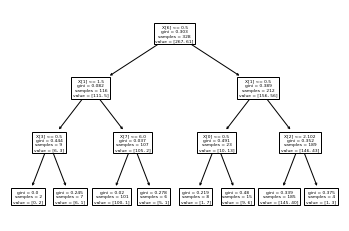

In [ ]:
from sklearn.metrics import accuracy_score
f=open("Results.txt",'w')
print(accuracy_score(y_test,predictions))
f.write("Accuracy with max_depth = 3 is "+str(accuracy_score(y_test,predictions))+'\n')
print("\n\n")
from sklearn.tree import plot_tree
plot_tree(classifier)

In [ ]:
# Decision Tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
f.write("Accuracy with max_depth = 2 is "+str(accuracy_score(y_test,predictions))+"\n")

0.7872340425531915


50

In [ ]:
# Decision Tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
f.write("Accuracy with max_depth = 4 is "+str(accuracy_score(y_test,predictions))+"\n")

0.8014184397163121


50

In [ ]:
features=[]
for i in dataset.columns[:-1]:
  features.append(i)
print(features)

['gender', 'sexuallity', 'age', 'income', 'race', 'social_fear', 'depressed', 'employment']


foreveralone.csv  Results.txt  sample_data/  tree.dot  tree.png


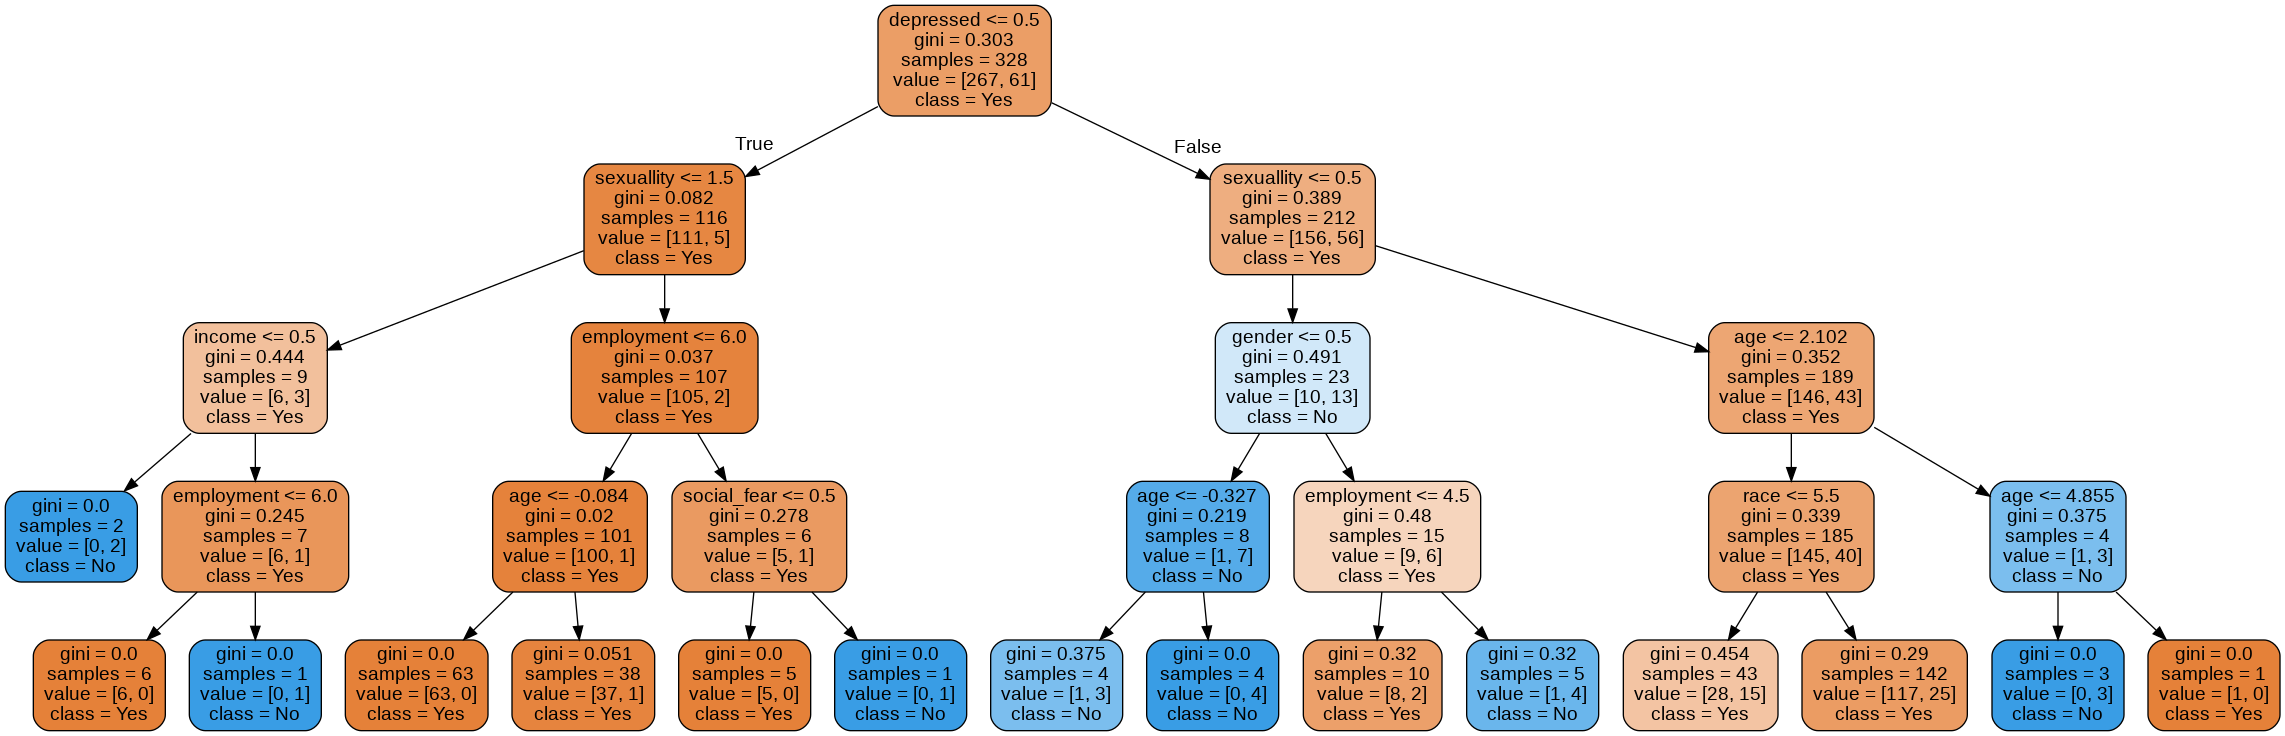

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    classifier,
    out_file='tree.dot',
    feature_names=features ,
    class_names=["Yes","No"],
    rounded=True,
    filled=True)

%ls
! dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image (filename='tree.png')

In [ ]:
# Decision Tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier(max_depth=2, max_features=2)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

0.8297872340425532


[Text(0.5, 0.8333333333333334, 'X[3] <= 5.0\ngini = 0.303\nsamples = 328\nvalue = [267, 61]'),
 Text(0.25, 0.5, 'X[6] <= 0.5\ngini = 0.351\nsamples = 229\nvalue = [177, 52]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.119\nsamples = 79\nvalue = [74, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.43\nsamples = 150\nvalue = [103, 47]'),
 Text(0.75, 0.5, 'X[6] <= 0.5\ngini = 0.165\nsamples = 99\nvalue = [90, 9]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.248\nsamples = 62\nvalue = [53, 9]')]

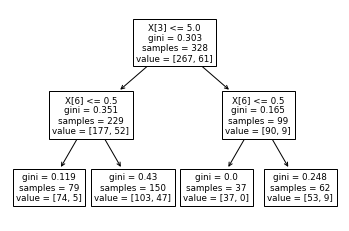

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
f.write("Accuracy with max_depth = 2 and max_features = 2 is "+str(accuracy_score(y_test,predictions))+"\n")
from sklearn.tree import plot_tree
plot_tree(classifier)

foreveralone.csv  Results.txt  sample_data/  tree.dot  tree.png


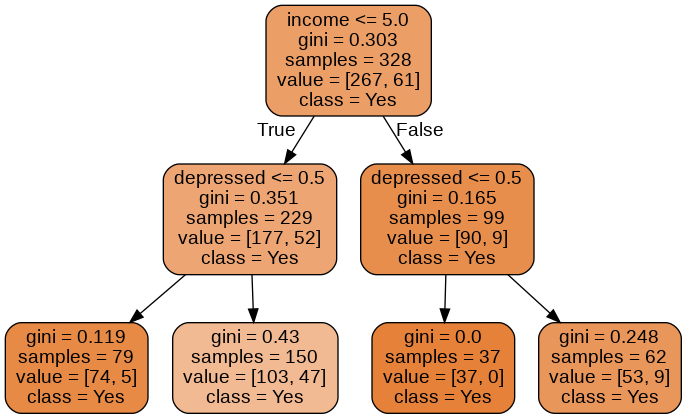

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    classifier,
    out_file='tree.dot',
    feature_names=features ,
    class_names=["Yes","No"],
    rounded=True,
    filled=True)

%ls
! dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image (filename='tree.png')

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) #instance of class by invoking function, builds the model
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[112   5]
 [ 22   2]]


In [ ]:
pred=classifier.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))
f.write("Accuracy with logistic regression is "+str(accuracy_score(y_test,predictions))+"\n")

0.8085106382978723


57